<h1><C><U>To Predict Life Expectancy Using Regression Analysis </U></C></h1>

<h3>What I did, </h3>


 - Data Cleaning
     - Filling the missing value - Imputation Technique
     - Applying the Feature transformation - log and square Transformation
     - Checking and capping the outliers - Winsoring technique


 - Feature Selection
     - Backward Selection
 
 
 - Checking the assumption of Regression analysis
     - Linearity between dependent and indpendent variable
     - Normality of the Error Terms
     - Multicollinearity
     - Autocorrelation
     - Homoscedasticity


In [956]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import math
import statsmodels.regression.linear_model as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.stattools import durbin_watson

from sklearn.preprocessing import StandardScaler,LabelEncoder,FunctionTransformer
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [957]:
#importing the data
df=pd.read_csv("C:/nidhisha/dataset/Life Expectancy Data.csv")
df.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [958]:
df.shape

(2938, 22)

In [959]:
df_info=pd.DataFrame()
df_info["dtypes"]=df.dtypes
df_info["null_value"]=df.isnull().sum()
df_info["unique value"]=df.nunique()

In [960]:
df_info

,dtypes,null_value,unique value
Country,object,0,193
Year,int64,0,16
Status,object,0,2
Life expectancy,float64,10,362
Adult Mortality,float64,10,425
infant deaths,int64,0,209
Alcohol,float64,194,1076
percentage expenditure,float64,0,2328
Hepatitis B,float64,553,87
Measles,int64,0,958


In [961]:
#converted to lower
df.columns=df.columns.str.lower()

#space between column name changed with _
df.columns=map(lambda x:"_".join(x.split(" ")),df.columns)

In [962]:
country_counts = df['country'].value_counts()
country_counts.tail(15)

Gabon                    16
Gambia                   16
Georgia                  16
Germany                  16
Ghana                    16
Tuvalu                    1
Cook Islands              1
Marshall Islands          1
Monaco                    1
Palau                     1
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: country, dtype: int64

In [963]:
df['year'].value_counts()
#we know that data from 2000 to 2015 and total country 193. So each country does not contain each year.

2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: year, dtype: int64

In [964]:
df.describe()

,year,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<h4>Distribution of data </h4>

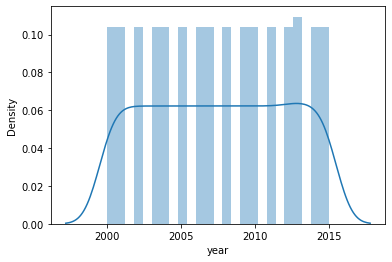

checking the skewed data of each column
year column : -0.0064090273593942005


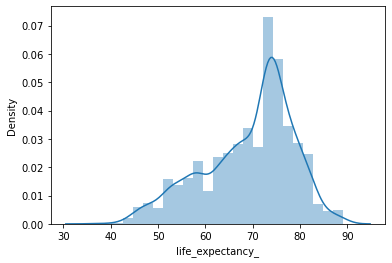

checking the skewed data of each column
life_expectancy_ column : -0.6386047358773552


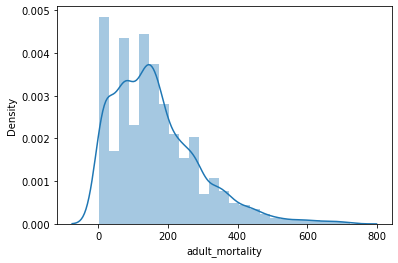

checking the skewed data of each column
adult_mortality column : 1.1743694876948636


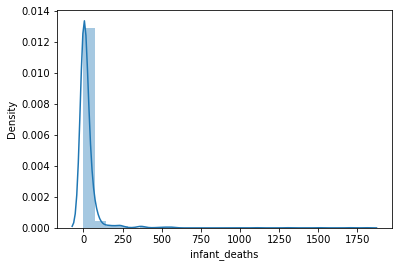

checking the skewed data of each column
infant_deaths column : 9.786962950426057


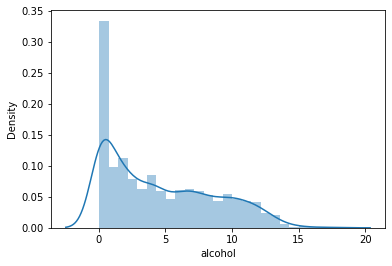

checking the skewed data of each column
alcohol column : 0.5895625281160799


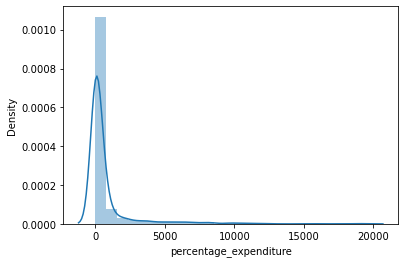

checking the skewed data of each column
percentage_expenditure column : 4.6520513478350605


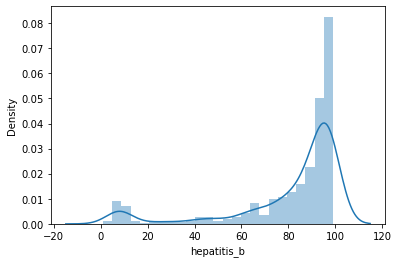

checking the skewed data of each column
hepatitis_b column : -1.9308451037678318


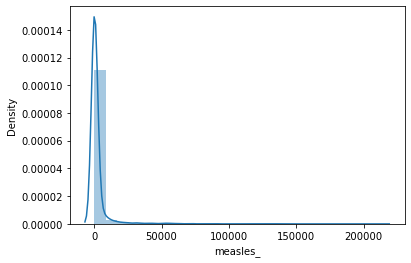

checking the skewed data of each column
measles_ column : 9.441331947061583


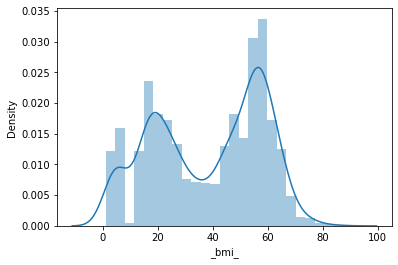

checking the skewed data of each column
_bmi_ column : -0.219311603419775


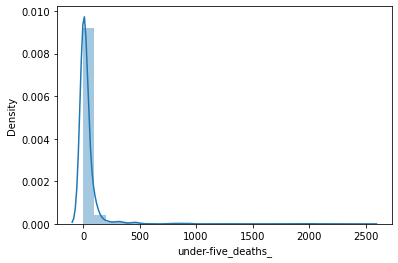

checking the skewed data of each column
under-five_deaths_ column : 9.495064656961773


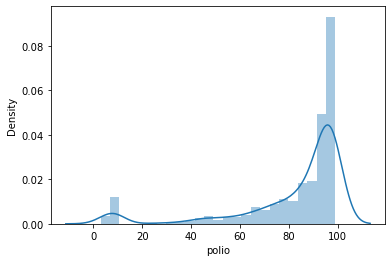

checking the skewed data of each column
polio column : -2.0980532489729056


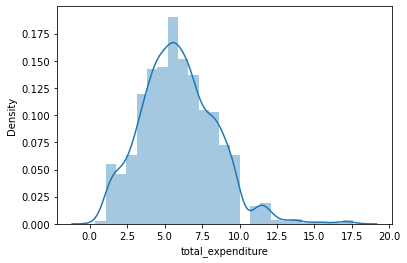

checking the skewed data of each column
total_expenditure column : 0.6186855520639749


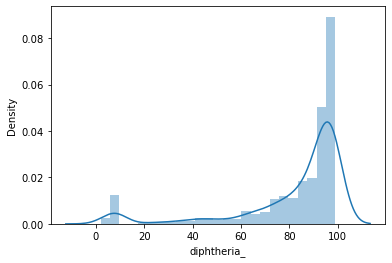

checking the skewed data of each column
diphtheria_ column : -2.0727529292965605


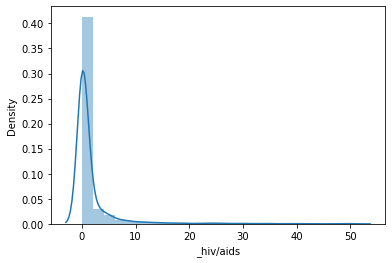

checking the skewed data of each column
_hiv/aids column : 5.396112042126371


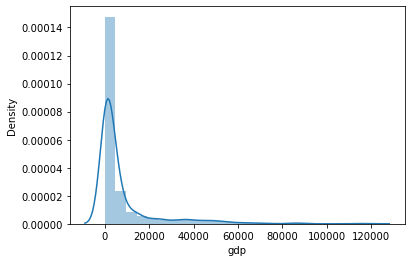

checking the skewed data of each column
gdp column : 3.2066548698696393


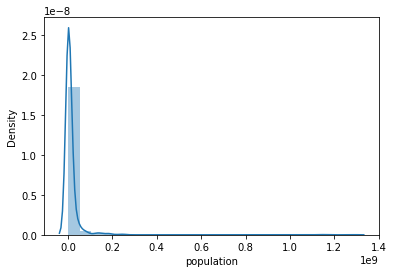

checking the skewed data of each column
population column : 15.916235598428203


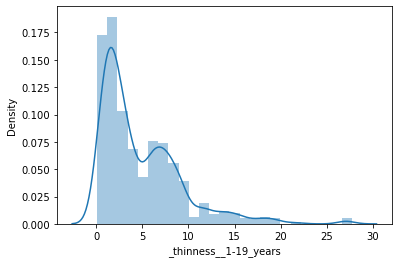

checking the skewed data of each column
_thinness__1-19_years column : 1.7114710881233637


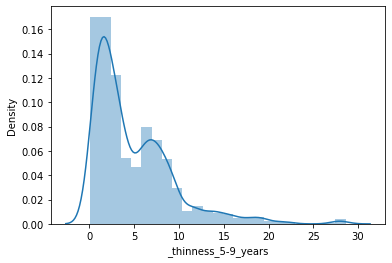

checking the skewed data of each column
_thinness_5-9_years column : 1.777423977376571


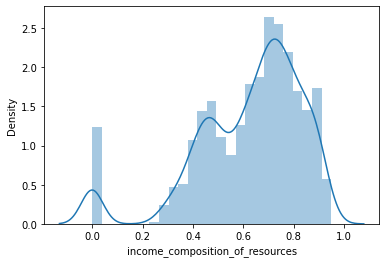

checking the skewed data of each column
income_composition_of_resources column : -1.143762720185521


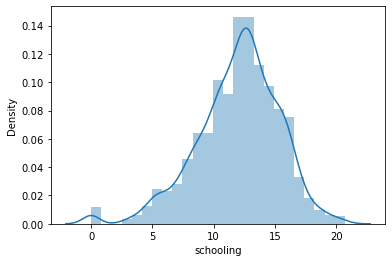

checking the skewed data of each column
schooling column : -0.6024365418785147


In [965]:
for i in df.columns:
    if(df[i].dtype!="object"):
        ax,fig=plt.subplots()
        sns.distplot(df[i],bins=25)
        plt.show()
        print("checking the skewed data of each column")
        print("{0} column :".format(i),df[i].skew()) 

In [966]:
for i in df.columns:
    if(df[i].dtype=="object"):
        print(i)
        print(sorted(df[i].unique()))

country
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 

### Filling the missing value

In [967]:
def fillna_mean(df_col):
    for col in df_col:
        country_means = df.groupby("country")[col].mean()

        # Then, fill missing values based on the calculated means
        df[col].fillna(df["country"].map(country_means),inplace=True)

        # Finally, fill any remaining missing values with the overall mean
        df[col].fillna(df[col].mean(), inplace=True)

In [968]:
# Listed the columns with missing values where the data is not skewed.
missing_val_col=["life_expectancy_","adult_mortality","alcohol","_bmi_","total_expenditure",
                 "income_composition_of_resources","schooling"]
fillna_mean(missing_val_col)

In [969]:
def fillna_median(df_col):
    for col in df_col:
        country_means = df.groupby("country")[col].median()

        # Then, fill missing values based on the calculated means
        df[col].fillna(df["country"].map(country_means),inplace=True)

        # Finally, fill any remaining missing values with the overall mean
        df[col].fillna(df[col].median(), inplace=True)

In [970]:
# Listed the columns with missing values where the data is skewed.
list_skewed_col=["infant_deaths","percentage_expenditure","hepatitis_b","measles_","under-five_deaths_","polio",
                "diphtheria_","_hiv/aids","gdp","population","_thinness__1-19_years","_thinness_5-9_years"]

fillna_median(list_skewed_col)

In [971]:
df.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy_                   0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles_                           0
_bmi_                              0
under-five_deaths_                 0
polio                              0
total_expenditure                  0
diphtheria_                        0
_hiv/aids                          0
gdp                                0
population                         0
_thinness__1-19_years              0
_thinness_5-9_years                0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [972]:
num_col=[]
cat_col=[]
for i in df.columns:
    if(df[i].dtypes=="object"):
        cat_col.append(i)
    else:
        num_col.append(i)

###   Function Transformation
The featured transformation techniques are used to transform the data to normal distribution for better performance of the algorithm. 

   Variables such as "infant_deaths," "alcohol," "percentage_expenditure," and "measles_" exhibit right skewness. Similarly, some other variables are left-skewed, prompting the application of log transformation and square transformation.

In [973]:
#apply the tranformation
def apply_transformation(transformer,col):
    print("before transforming the {0} col".format(col))
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    sp.probplot(df[col],rvalue=True,dist='norm',plot=plt)
    plt.xlabel(col)
    plt.show()
    
    print("After transformnin the {0} column".format(col))
    trf_col=transformer.fit_transform(df[col])
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    sns.distplot(trf_col)
    plt.subplot(132)
    sns.boxplot(trf_col)
    plt.subplot(133)
    sp.probplot(trf_col,rvalue=True,dist='norm',plot=plt)
    plt.xlabel(col)
    plt.show()

    return trf_col

before transforming the year col


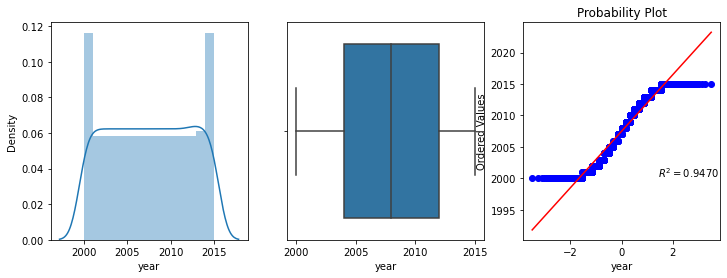

After transformnin the year column


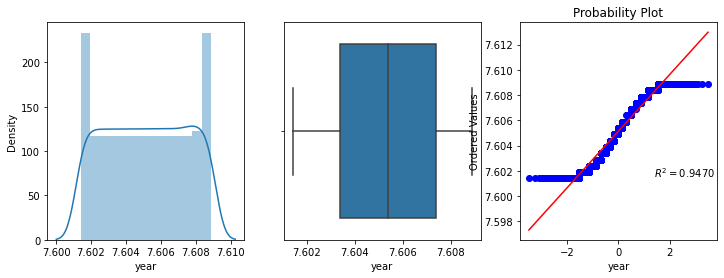

before transforming the life_expectancy_ col


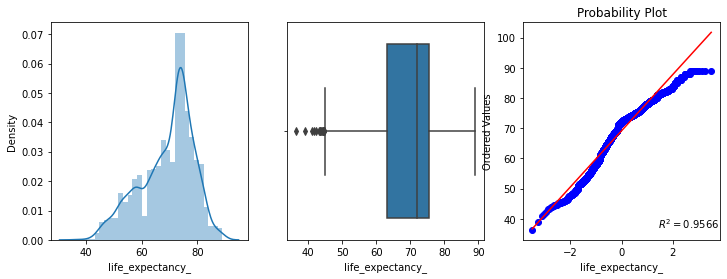

After transformnin the life_expectancy_ column


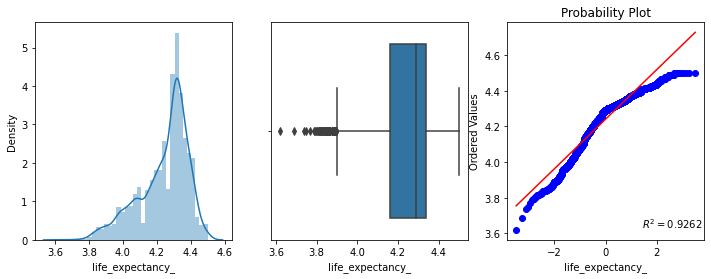

before transforming the adult_mortality col


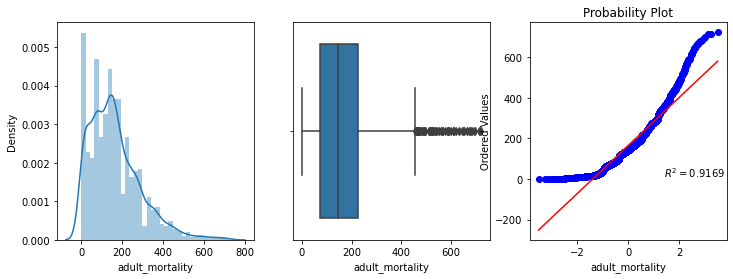

After transformnin the adult_mortality column


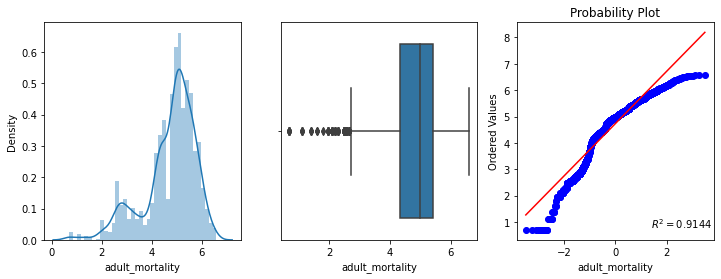

before transforming the infant_deaths col


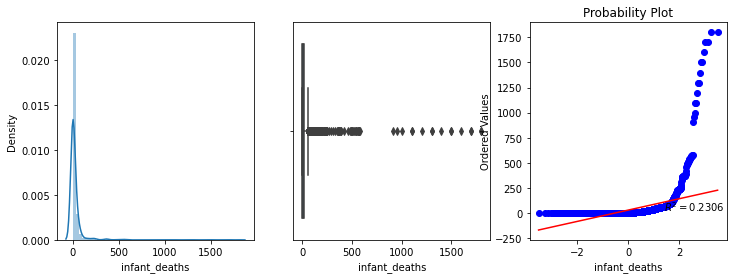

After transformnin the infant_deaths column


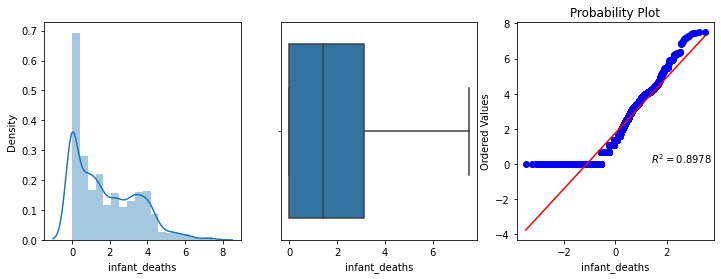

before transforming the alcohol col


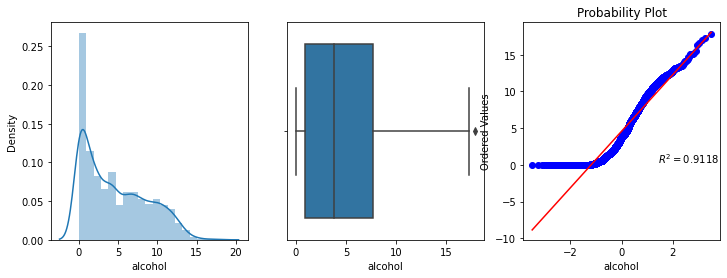

After transformnin the alcohol column


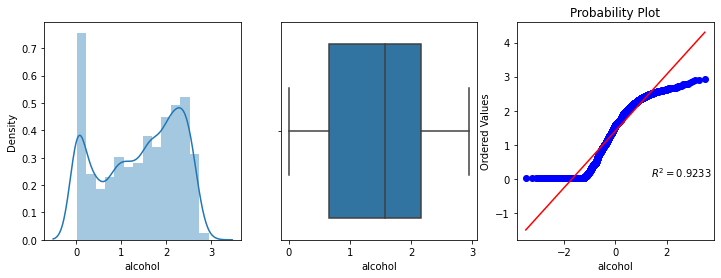

before transforming the percentage_expenditure col


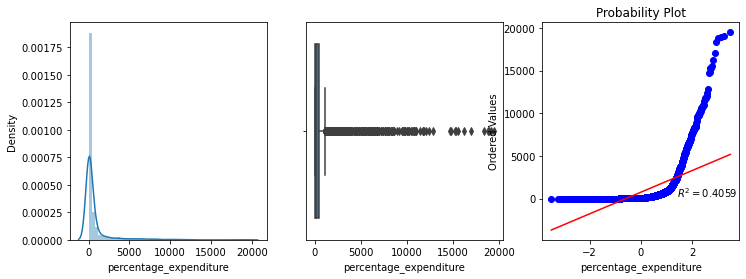

After transformnin the percentage_expenditure column


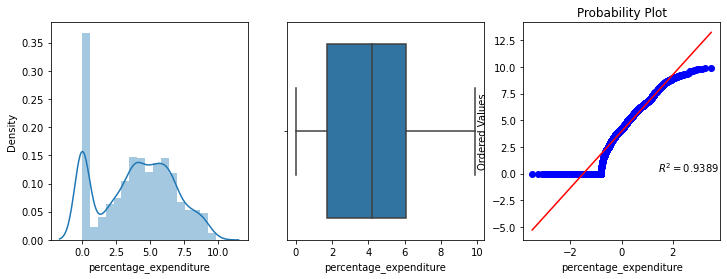

before transforming the hepatitis_b col


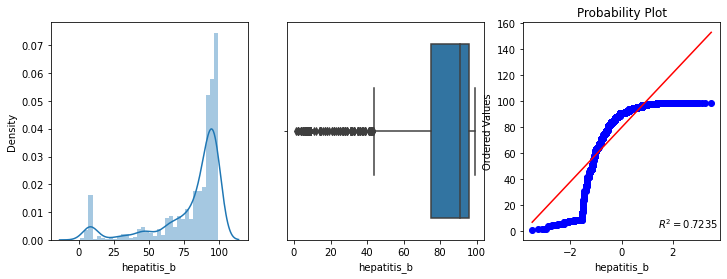

After transformnin the hepatitis_b column


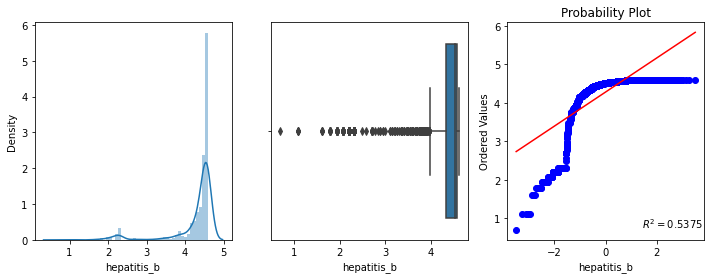

before transforming the measles_ col


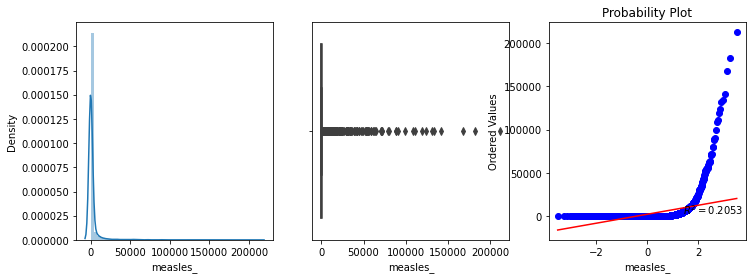

After transformnin the measles_ column


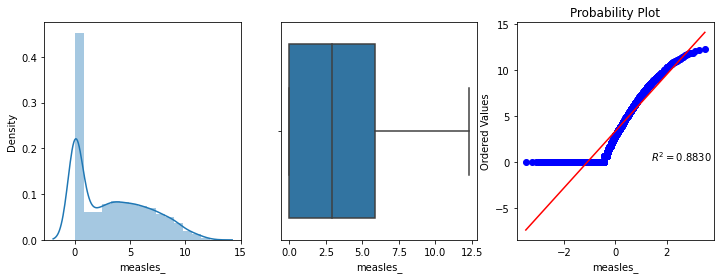

before transforming the _bmi_ col


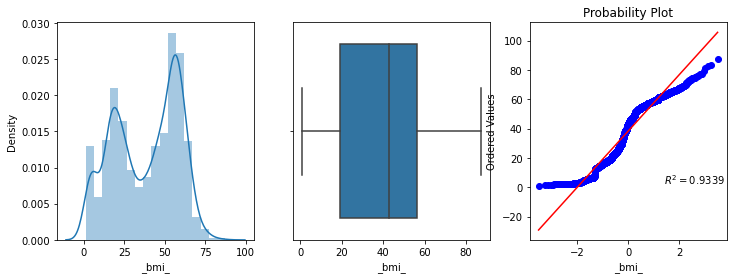

After transformnin the _bmi_ column


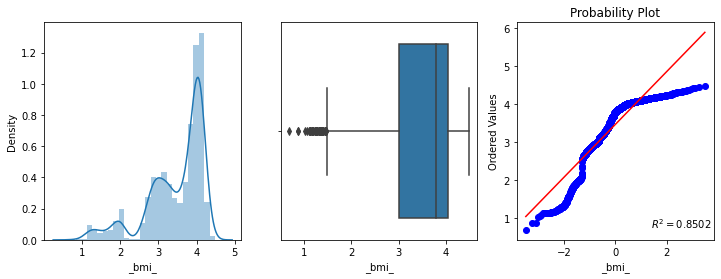

before transforming the under-five_deaths_ col


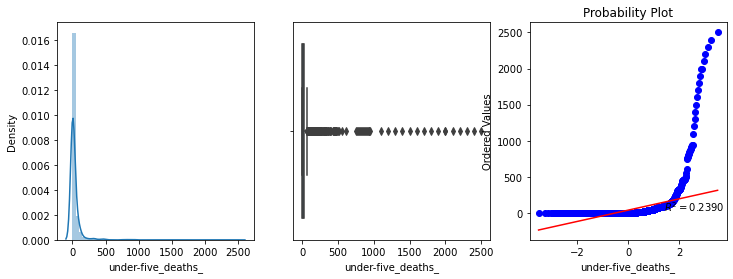

After transformnin the under-five_deaths_ column


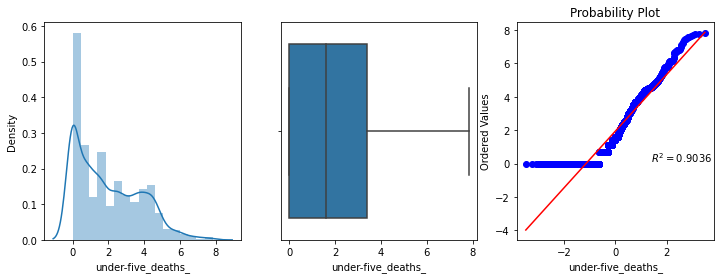

before transforming the polio col


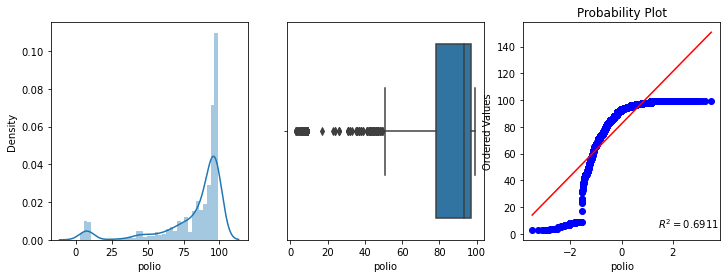

After transformnin the polio column


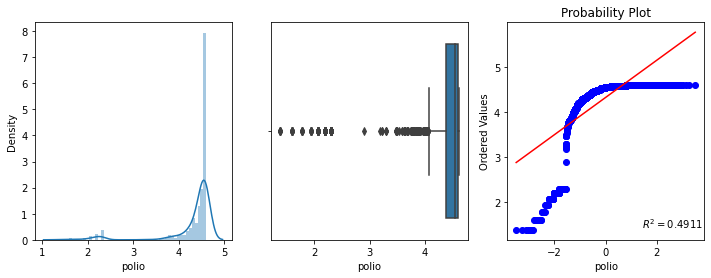

before transforming the total_expenditure col


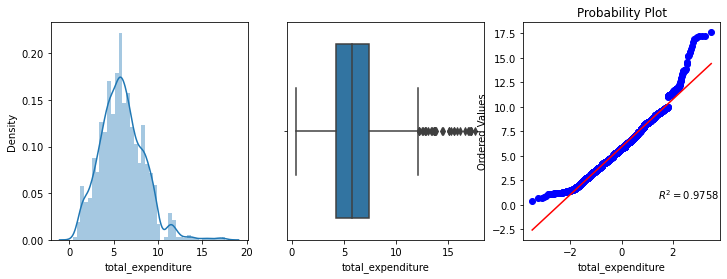

After transformnin the total_expenditure column


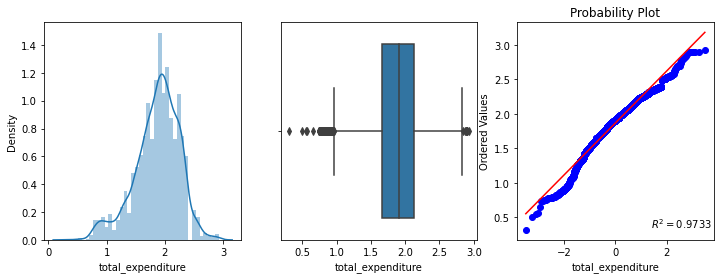

before transforming the diphtheria_ col


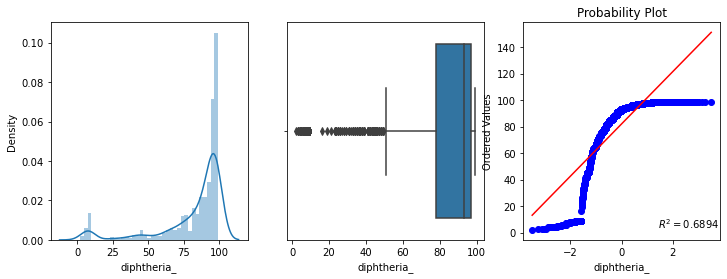

After transformnin the diphtheria_ column


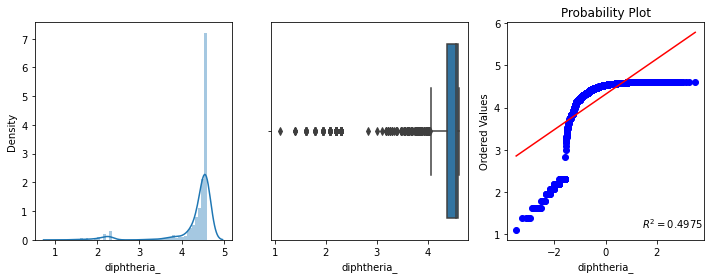

before transforming the _hiv/aids col


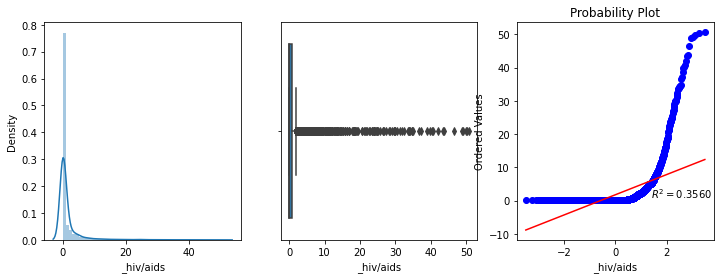

After transformnin the _hiv/aids column


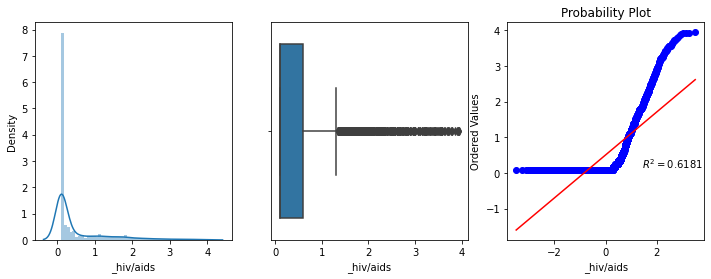

before transforming the gdp col


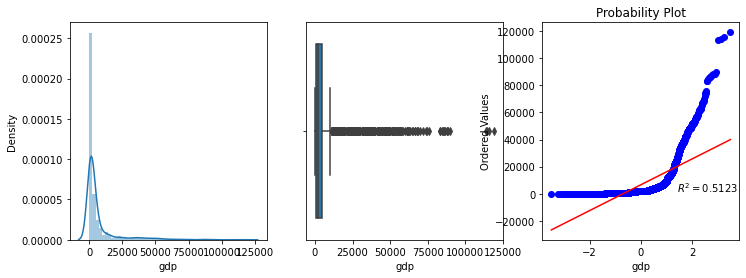

After transformnin the gdp column


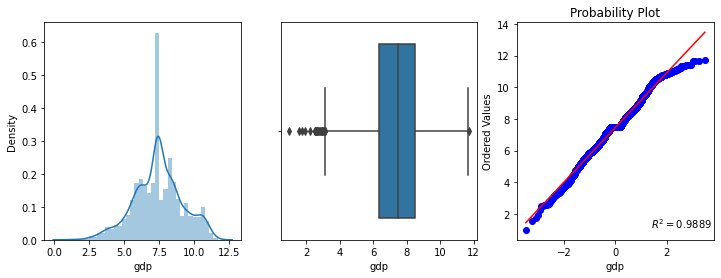

before transforming the population col


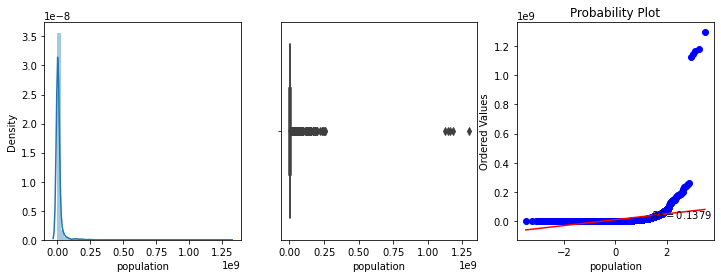

After transformnin the population column


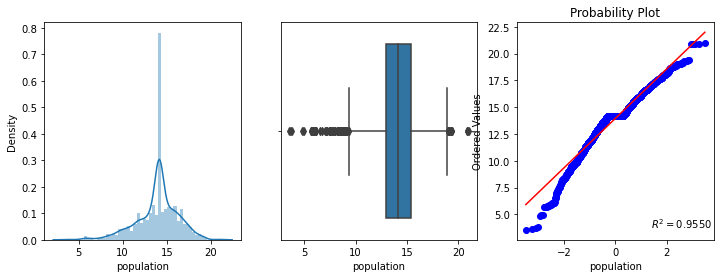

before transforming the _thinness__1-19_years col


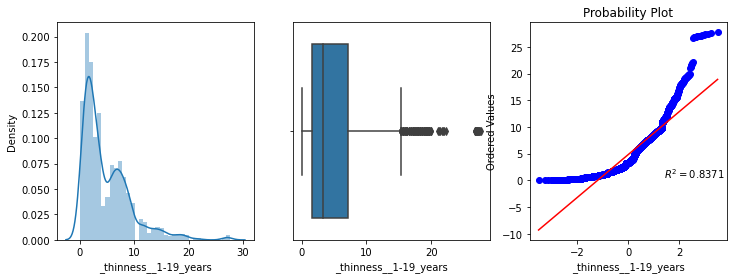

After transformnin the _thinness__1-19_years column


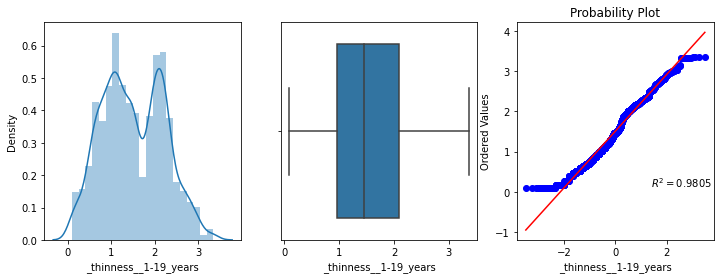

before transforming the _thinness_5-9_years col


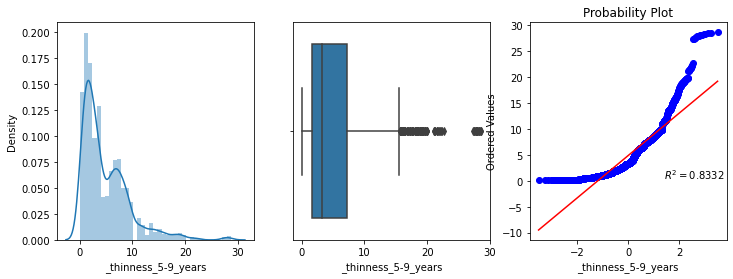

After transformnin the _thinness_5-9_years column


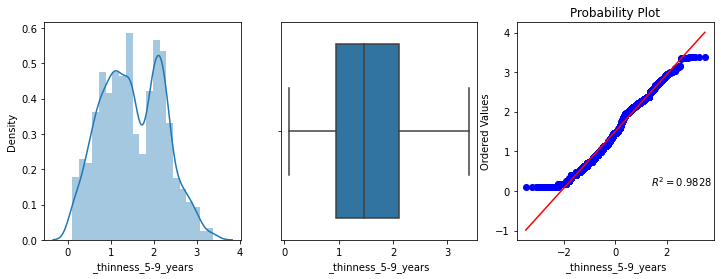

before transforming the income_composition_of_resources col


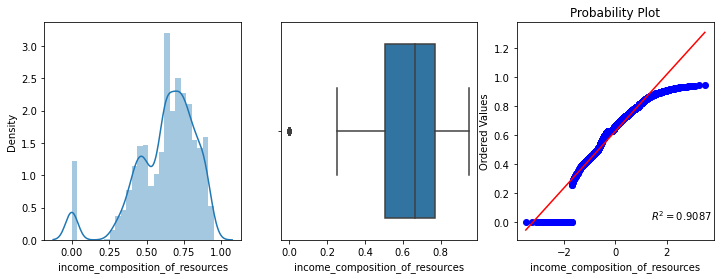

After transformnin the income_composition_of_resources column


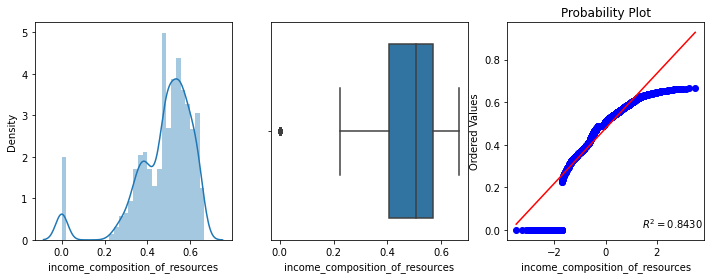

before transforming the schooling col


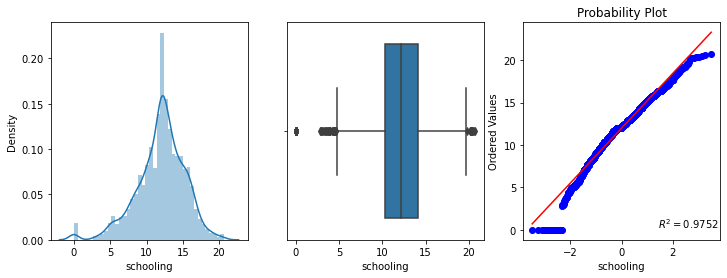

After transformnin the schooling column


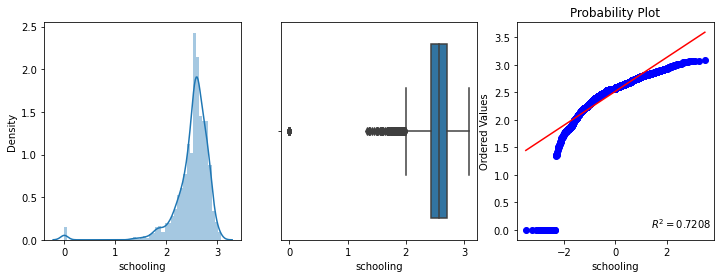

In [974]:
#applying the log transform
log_trf=[]
for col in num_col:
    val=apply_transformation(FunctionTransformer(np.log1p),col)
    log_trf.append(val)

In [975]:
log_trf_data=pd.DataFrame(log_trf).T

before transforming the year col


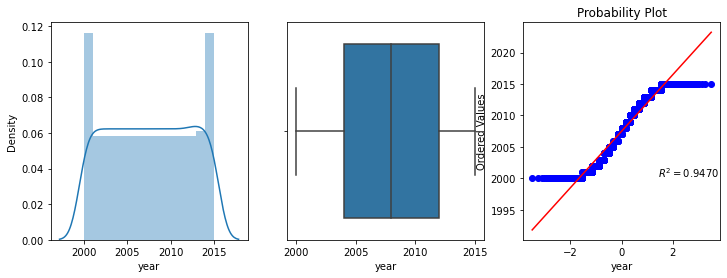

After transformnin the year column


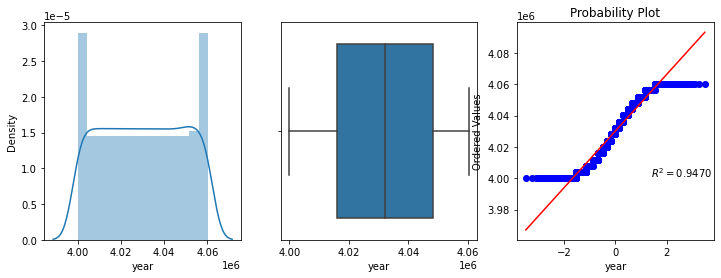

before transforming the life_expectancy_ col


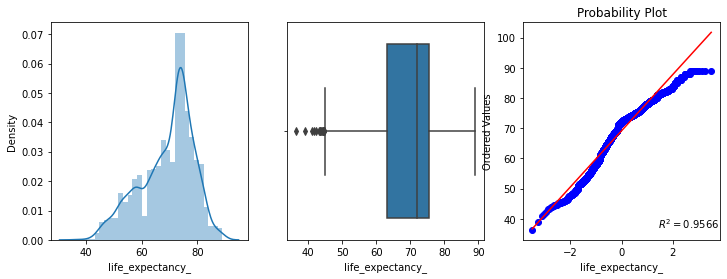

After transformnin the life_expectancy_ column


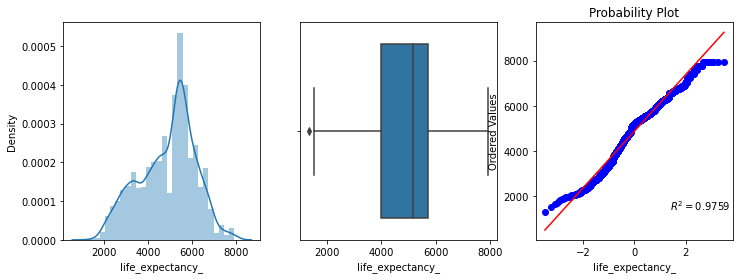

before transforming the adult_mortality col


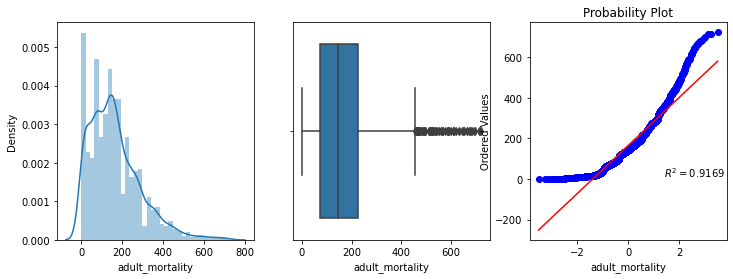

After transformnin the adult_mortality column


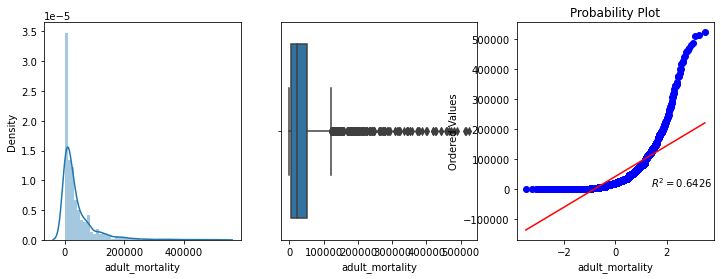

before transforming the infant_deaths col


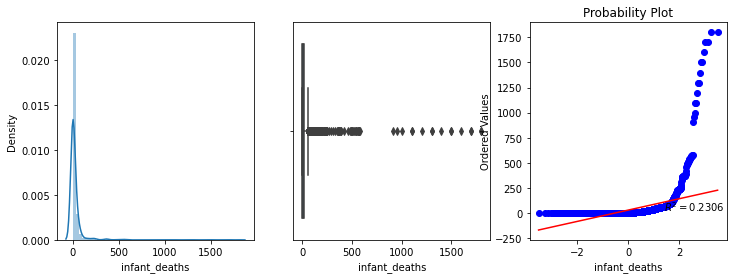

After transformnin the infant_deaths column


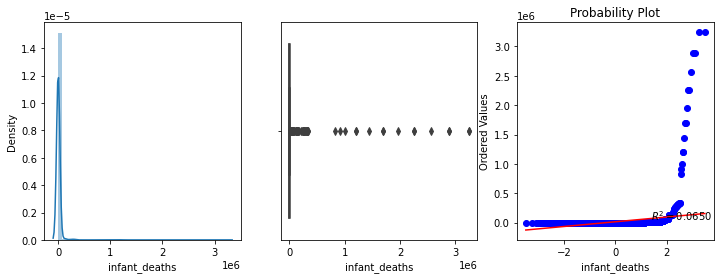

before transforming the alcohol col


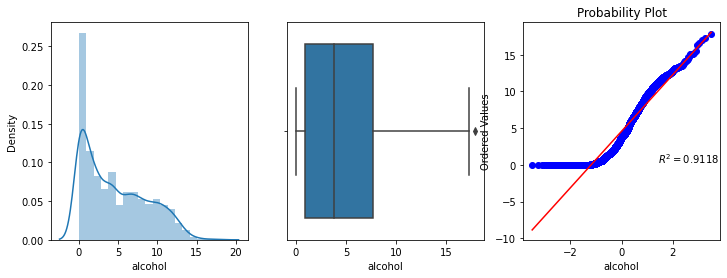

After transformnin the alcohol column


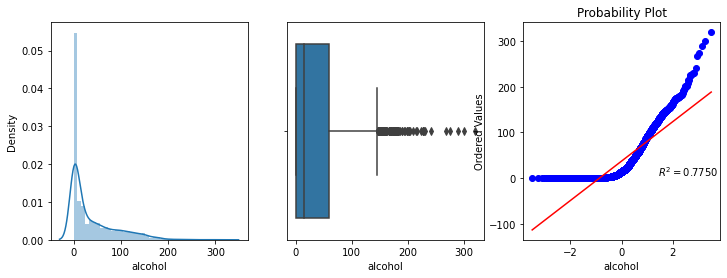

before transforming the percentage_expenditure col


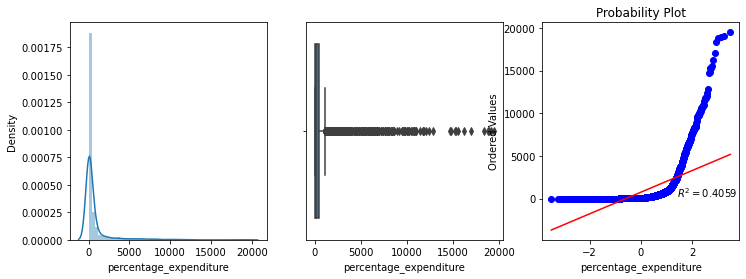

After transformnin the percentage_expenditure column


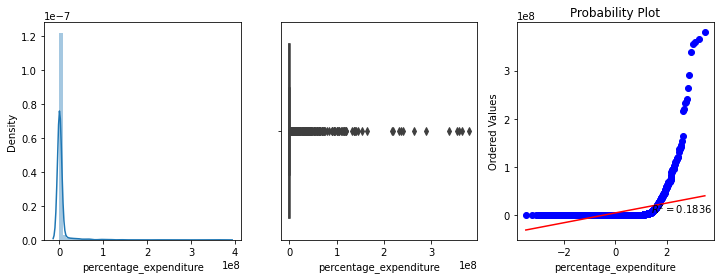

before transforming the hepatitis_b col


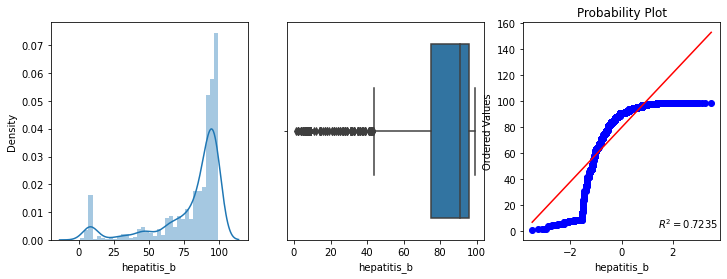

After transformnin the hepatitis_b column


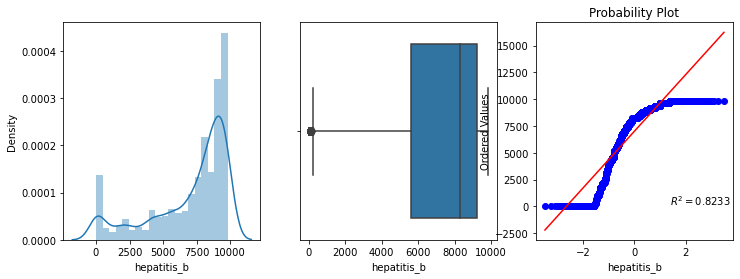

before transforming the measles_ col


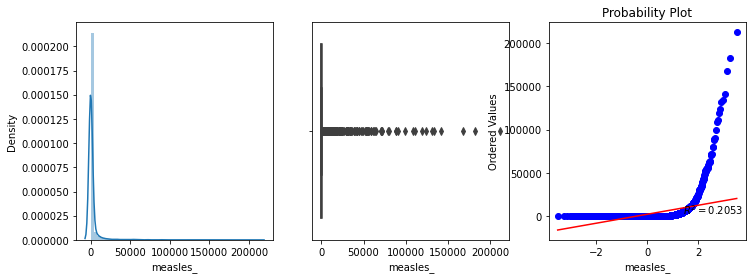

After transformnin the measles_ column


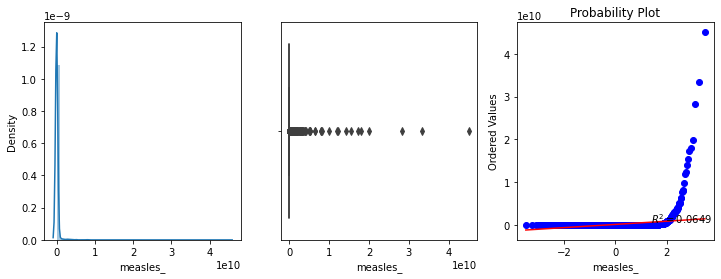

before transforming the _bmi_ col


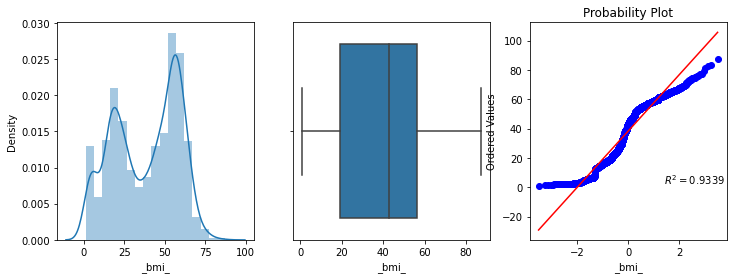

After transformnin the _bmi_ column


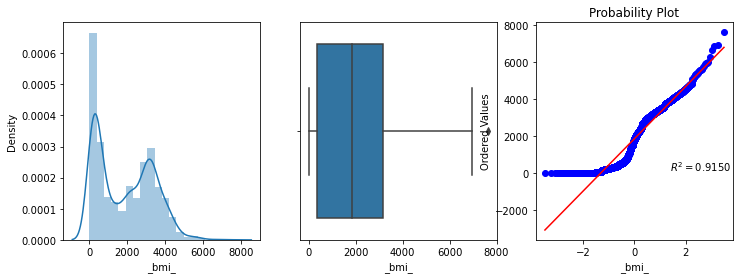

before transforming the under-five_deaths_ col


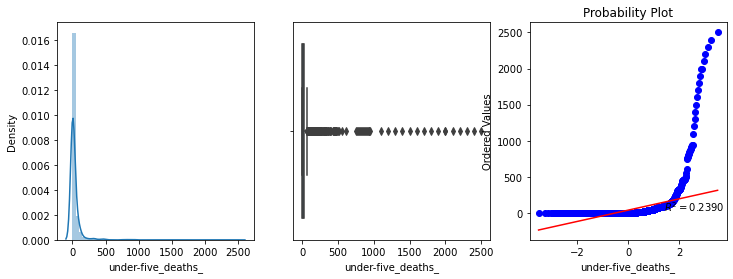

After transformnin the under-five_deaths_ column


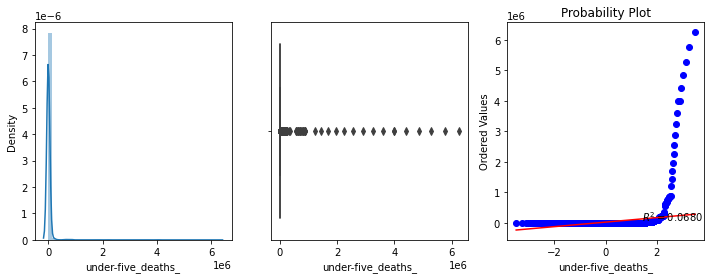

before transforming the polio col


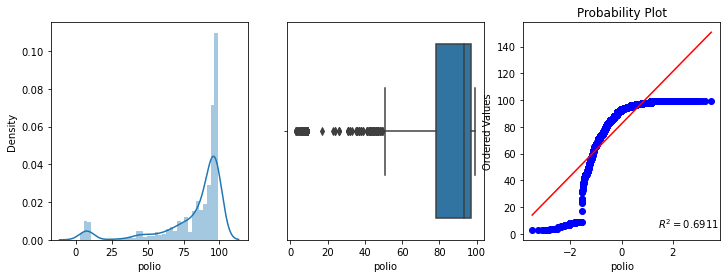

After transformnin the polio column


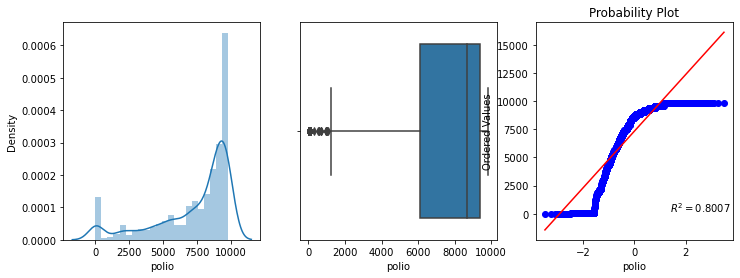

before transforming the total_expenditure col


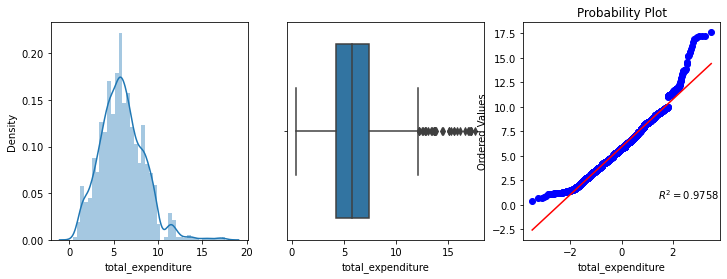

After transformnin the total_expenditure column


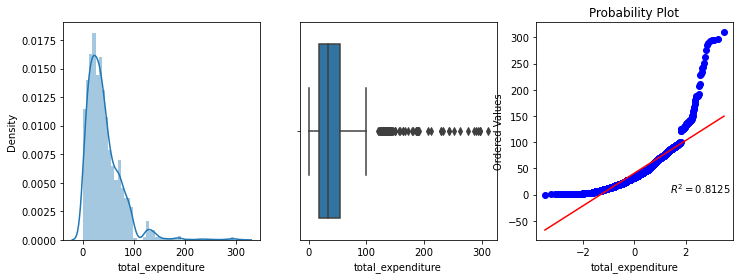

before transforming the diphtheria_ col


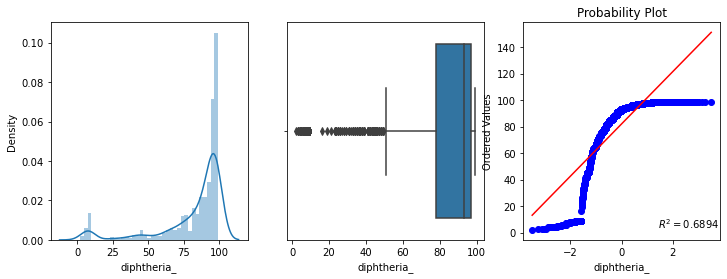

After transformnin the diphtheria_ column


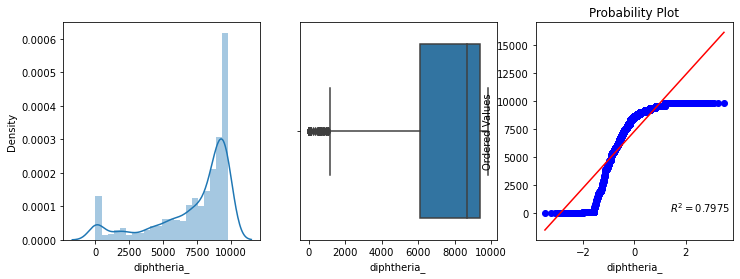

before transforming the _hiv/aids col


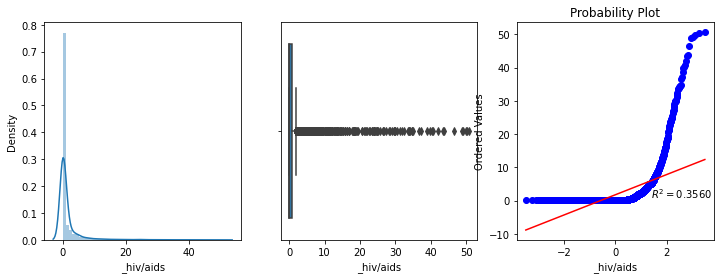

After transformnin the _hiv/aids column


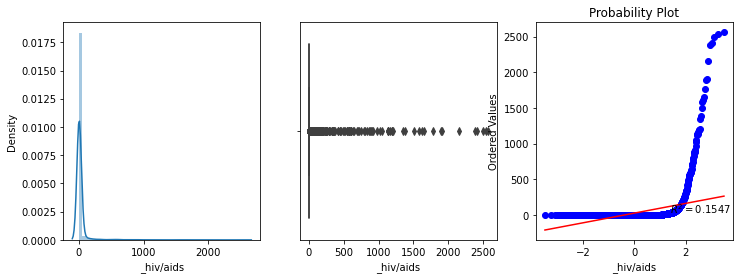

before transforming the gdp col


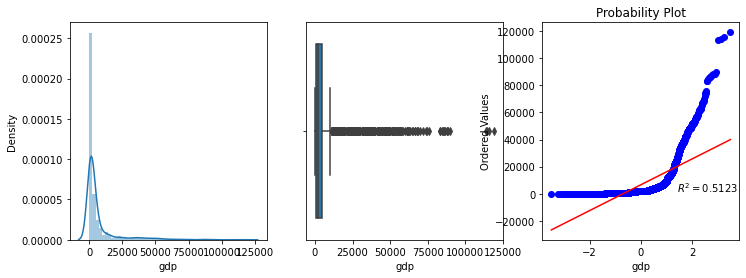

After transformnin the gdp column


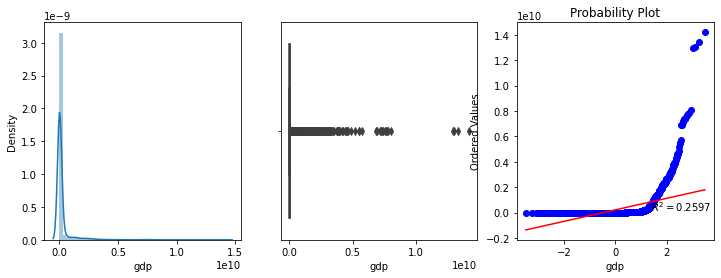

before transforming the population col


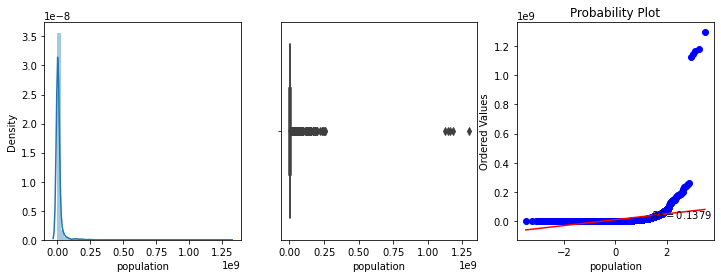

After transformnin the population column


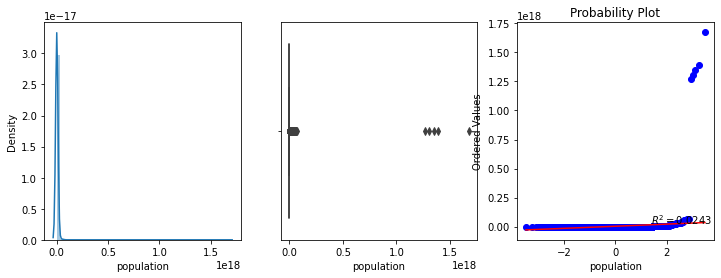

before transforming the _thinness__1-19_years col


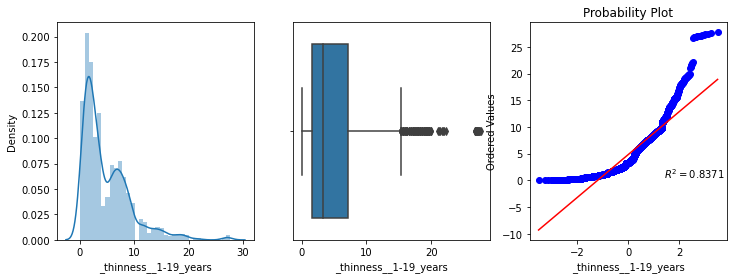

After transformnin the _thinness__1-19_years column


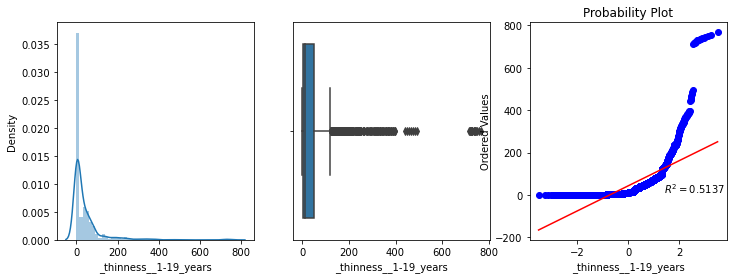

before transforming the _thinness_5-9_years col


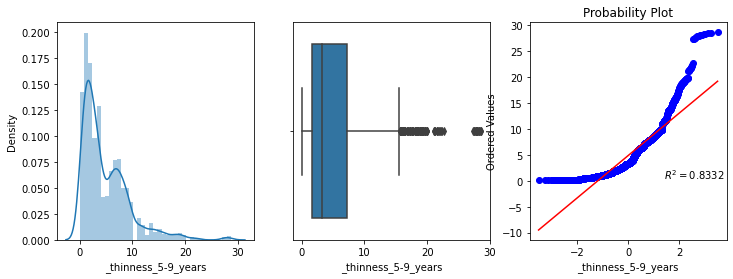

After transformnin the _thinness_5-9_years column


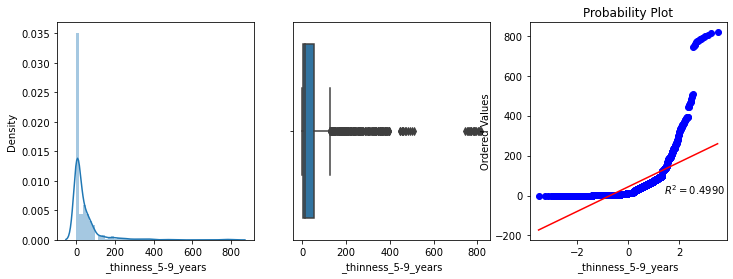

before transforming the income_composition_of_resources col


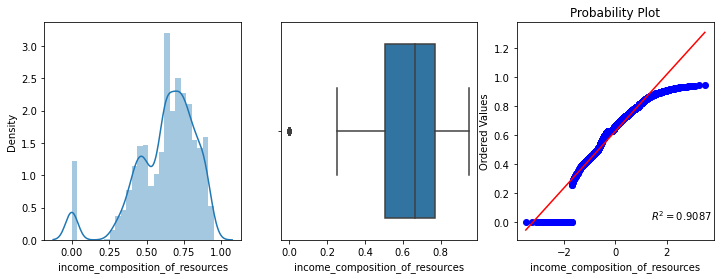

After transformnin the income_composition_of_resources column


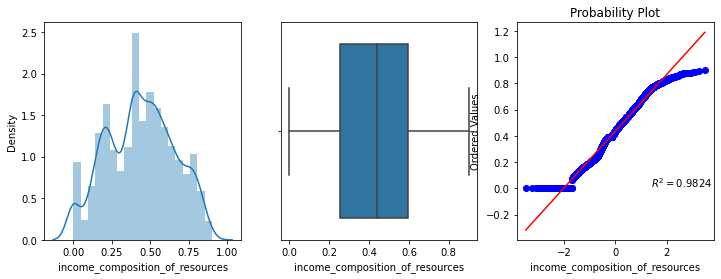

before transforming the schooling col


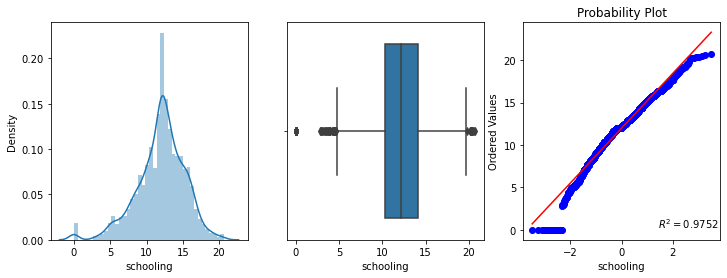

After transformnin the schooling column


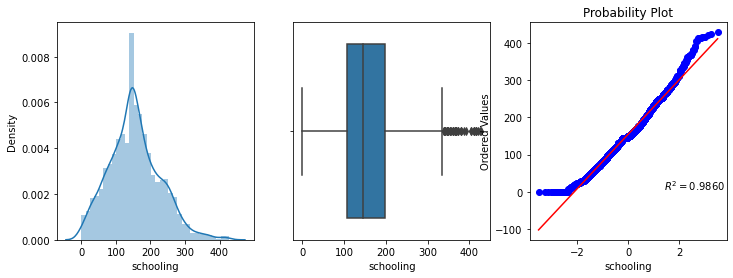

In [976]:
# applying the square

square_trf=[]
for col in num_col:
    val=apply_transformation(FunctionTransformer(np.square),col)
    square_trf.append(val)

In [977]:
square_trf_data=pd.DataFrame(square_trf).T

#### listed the variable which we want to transfrom.

In [978]:

trf_log=["infant_deaths","alcohol","percentage_expenditure","measles_",
        "under-five_deaths_","gdp","population","_thinness__1-19_years",
        "_thinness_5-9_years","_hiv/aids"]

trf_square=["hepatitis_b","polio","diphtheria_","life_expectancy_"]

remaining_col=["country","year","status","adult_mortality",
          "_bmi_","total_expenditure","income_composition_of_resources","schooling",]

In [979]:
data=pd.merge(square_trf_data[trf_square],log_trf_data[trf_log],
              left_index=True,right_index=True).merge(df[remaining_col],left_index=True,right_index=True)

In [980]:
data.head(2)

,hepatitis_b,polio,diphtheria_,life_expectancy_,infant_deaths,alcohol,percentage_expenditure,measles_,under-five_deaths_,gdp,...,_thinness_5-9_years,_hiv/aids,country,year,status,adult_mortality,_bmi_,total_expenditure,income_composition_of_resources,schooling
0,4225.0,36.0,4225.0,4225.00,4.143135,0.00995,4.280542,7.051856,4.430817,6.372055,...,2.906901,0.09531,Afghanistan,2015,Developing,263.0,19.1,8.16,0.479,10.1
1,3844.0,3364.0,3844.0,3588.01,4.174387,0.00995,4.311116,6.200509,4.465908,6.419501,...,2.917771,0.09531,Afghanistan,2014,Developing,271.0,18.6,8.18,0.476,10.0


### check  the outliers

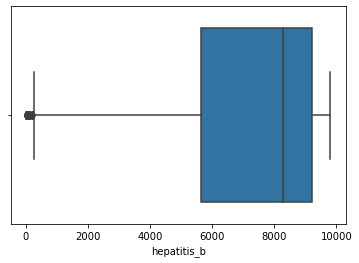

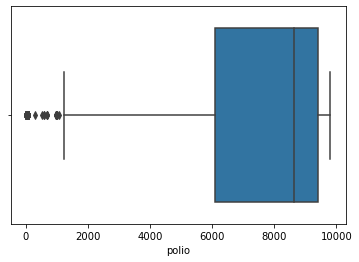

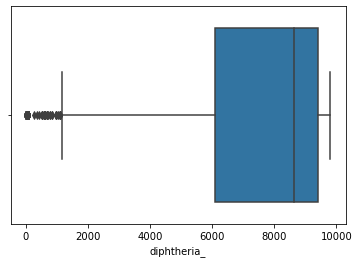

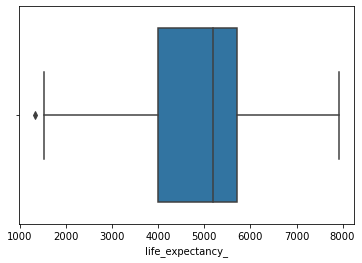

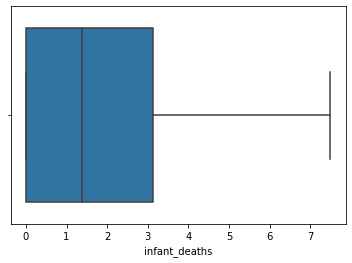

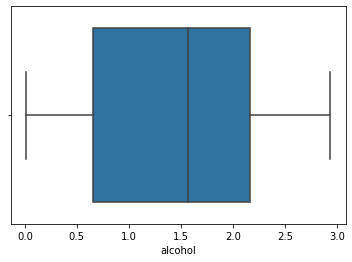

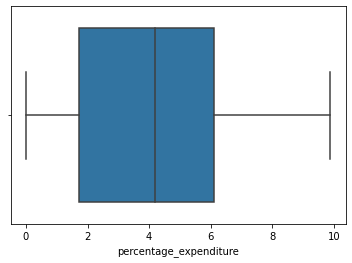

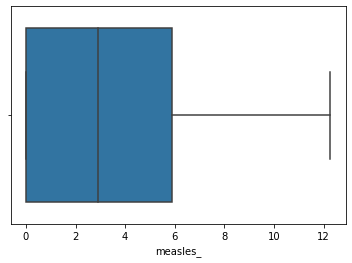

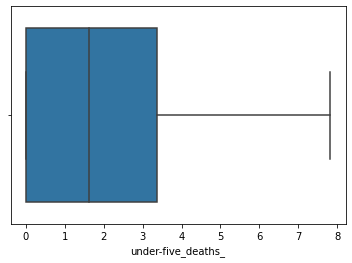

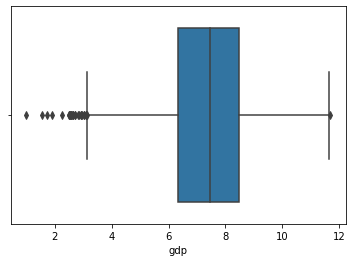

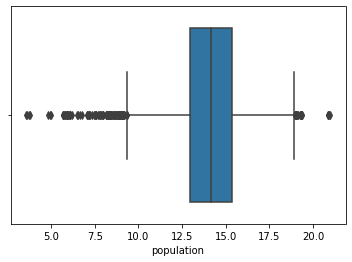

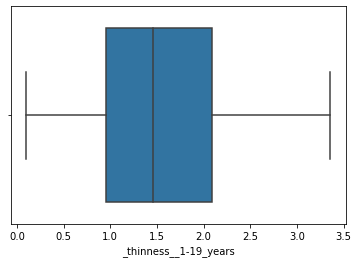

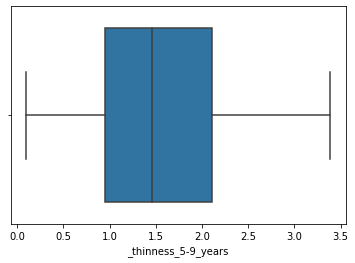

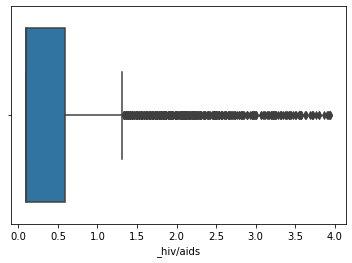

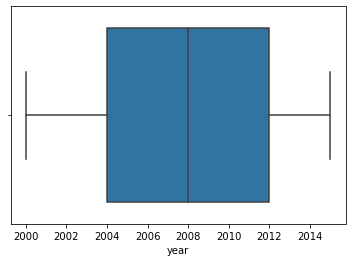

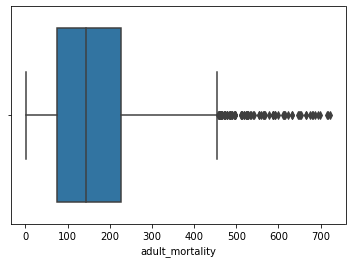

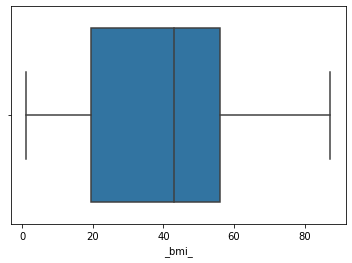

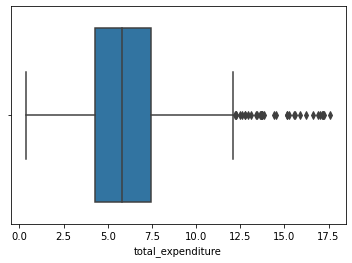

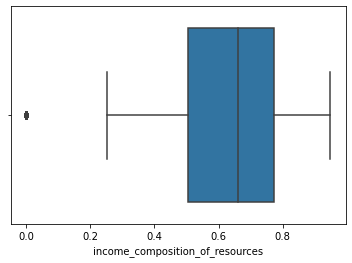

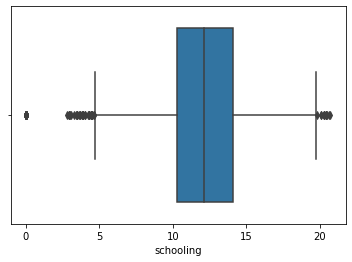

In [981]:
for i in data.columns:
    if(data[i].dtype!="object"):
        ax,fig=plt.subplots()
        sns.boxplot(data[i])
        plt.show()

In [982]:
#reducing the outliers

In [983]:
#listed the skewed column after transforming the data
outliers_col=["polio","diphtheria_","gdp","population","_hiv/aids","adult_mortality",
             "total_expenditure","schooling"]

##  Winsorize

<h4> I applied the capping method using percentiles to handle extreme values in the dataset. </h4>

In [984]:
for i in outliers_col:
    upper_limit=data[i].quantile(0.95)
    lower_limit=data[i].quantile(0.05)
    
    data[i]=np.where(data[i]>upper_limit, upper_limit,
                    np.where(data[i]<lower_limit, lower_limit,
                    data[i]))
    

### Data Preprocessing

In [985]:
#categorical encoding

In [986]:
data["status"].replace("Developing",0,inplace=True)
data["status"].replace("Developed",1,inplace=True)

In [987]:
data["status"].unique()

array([0, 1], dtype=int64)

In [988]:
data=data.drop(columns="country")  #droping the column country

In [989]:
X=data.drop(columns="life_expectancy_")
y=data["life_expectancy_"]

In [990]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2350, 20) (588, 20) (2350,) (588,)


## Backward Elimination

In [991]:
def regressor_selection(X,y):
    ols=sm.OLS(endog=y,exog=X).fit()
    return ols.summary() 

In [992]:
print(regressor_selection(x_train,y_train))
print("_"*125)

                                 OLS Regression Results                                
Dep. Variable:       life_expectancy_   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.279e+04
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                        0.00
Time:                        03:03:04   Log-Likelihood:                         -17843.
No. Observations:                2350   AIC:                                  3.573e+04
Df Residuals:                    2330   BIC:                                  3.584e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

### Summary

In the above OLS regrssion result, either the F-statistic (t-square) has the lowest value, or the p-value is greater than 0.05 (threshold) and has the highest value among them. In such cases, the corresponding regressor will be dropped because the contribution of that regressor is deemed very low.

By looking the co-effecient value any of the value which is close to the zero. Then also we can say that there is no relationship between the dependent and indepedent variable.

Durbin-watson test -Used to check the autocorrelation, if D-W test value is 2.053 equaivelent to 2 then we can considered that there is no autocorrelation.

skewness- Here observed that skewness value is 0.113, hence sighlty positively skewed.(=0 there is no skewness )

Kurtosis- Here observed that Kurtosis is 3.852 says the same thing (>3 means postively skewed)

Conditional number-The condition number is large, 1.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.

In [993]:
x_train=x_train.drop(columns="_bmi_")
print(regressor_selection(x_train,y_train))

                                 OLS Regression Results                                
Dep. Variable:       life_expectancy_   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.346e+04
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                        0.00
Time:                        03:03:04   Log-Likelihood:                         -17843.
No. Observations:                2350   AIC:                                  3.572e+04
Df Residuals:                    2331   BIC:                                  3.583e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [994]:
x_train=x_train.drop(columns="total_expenditure")
print(regressor_selection(x_train,y_train))

                                 OLS Regression Results                                
Dep. Variable:       life_expectancy_   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.421e+04
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                        0.00
Time:                        03:03:04   Log-Likelihood:                         -17844.
No. Observations:                2350   AIC:                                  3.572e+04
Df Residuals:                    2332   BIC:                                  3.583e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [995]:
x_train=x_train.drop(columns="_thinness__1-19_years")
print(regressor_selection(x_train,y_train))

                                 OLS Regression Results                                
Dep. Variable:       life_expectancy_   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.504e+04
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                        0.00
Time:                        03:03:04   Log-Likelihood:                         -17844.
No. Observations:                2350   AIC:                                  3.572e+04
Df Residuals:                    2333   BIC:                                  3.582e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [996]:
x_train=x_train.drop(columns="hepatitis_b")
print(regressor_selection(x_train,y_train))

                                 OLS Regression Results                                
Dep. Variable:       life_expectancy_   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.598e+04
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                        0.00
Time:                        03:03:04   Log-Likelihood:                         -17845.
No. Observations:                2350   AIC:                                  3.572e+04
Df Residuals:                    2334   BIC:                                  3.582e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [997]:
x_train=x_train.drop(columns="percentage_expenditure")
print(regressor_selection(x_train,y_train))

                                 OLS Regression Results                                
Dep. Variable:       life_expectancy_   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.700e+04
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                        0.00
Time:                        03:03:04   Log-Likelihood:                         -17849.
No. Observations:                2350   AIC:                                  3.573e+04
Df Residuals:                    2335   BIC:                                  3.581e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [998]:
x_train=x_train.drop(columns="polio")
print(regressor_selection(x_train,y_train))

                                 OLS Regression Results                                
Dep. Variable:       life_expectancy_   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.815e+04
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                        0.00
Time:                        03:03:04   Log-Likelihood:                         -17853.
No. Observations:                2350   AIC:                                  3.573e+04
Df Residuals:                    2336   BIC:                                  3.581e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [999]:
x_train=x_train.drop(columns="measles_")
print(regressor_selection(x_train,y_train))

                                 OLS Regression Results                                
Dep. Variable:       life_expectancy_   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.949e+04
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                        0.00
Time:                        03:03:04   Log-Likelihood:                         -17857.
No. Observations:                2350   AIC:                                  3.574e+04
Df Residuals:                    2337   BIC:                                  3.582e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

### using mlxtend selecting the regressor

In [1000]:
lreg = LinearRegression()

sfs1=sfs(lreg,k_features=13,forward=False,verbose=2,scoring='neg_mean_squared_error')

In [1001]:
sfs1.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(13, 13), scoring='neg_mean_squared_error',
                          verbose=2)

In [1002]:
#just to cross check
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['diphtheria_', 'infant_deaths', 'alcohol', 'under-five_deaths_', 'gdp', 'population', '_thinness_5-9_years', '_hiv/aids', 'year', 'status', 'adult_mortality', 'income_composition_of_resources', 'schooling']


In [1003]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)

<h4>By observing the selections made by both mlxtend and the F-statistic (or p-value), the same variable was chose </h4>

### fit the regression using the sklearn

In [1004]:
lreg=LinearRegression()
lreg.fit(x_train_scaled,y_train)

LinearRegression()

In [1005]:
y_pred=lreg.predict(x_train_scaled)

In [1006]:
print('Mean square Error (MsE):', round(mean_squared_error(y_train, y_pred),3))  
print('Mean square Error (MRSE):', math.sqrt(round(mean_squared_error(y_train, y_pred),3)))

r_square=round(r2_score(y_train, y_pred),5)
print('R2_score:',r_square) 

n=2350
k=16
adjusted_r_squared = 1 - ((1 - r_square) * (n - 1) / (n - k - 1))
print("Adjusted r2_score",round(adjusted_r_squared,5))

Mean square Error (MsE): 231802.147
Mean square Error (MRSE): 481.45835437761383
R2_score: 0.85621
Adjusted r2_score 0.85522


## Checking the assumption

In [1007]:
#calculating the actual and predict value of life expectancy
result=pd.DataFrame({"predicted":np.sqrt(y_pred),"actual":np.sqrt(y_train)})
result.head()

,predicted,actual
1016,60.543074,66.0
2451,70.866322,74.2
664,77.909891,77.9
573,69.306031,72.7
2129,75.640472,71.9


In [1008]:
#calculating the residuals
residuals= abs(result['actual']) - abs(result['predicted'])

<h2>1) Linearity </h2>

This assumes that there is Relationship between the independent (predictor or feature) and dependent(response) variable.

<h3> What it will effect ,</h3>
    The prediction will be extremely inaccurate because our model is underfitting. This is a serious violation that should not be ignored.

<h3> How to detect it ,</h3>

   - By using a simple scatter plot can find the relationship between the dependent and independent variable. 
   
   - Also we can done by ploting a regrssion plot (actual and predicted). which the points should lie on or around a diagonal        line.
   
   - By looking the coffecient of each regressor can find the relationship

<h3> How to fix it ,</h3>
    Adding polynomial terms to some of the predictors or applying nonlinear transformations

In [1009]:
#linearity
def check_linearity(data,x,y):
    plt.figure(figsize=(10,8))
    sns.regplot(x=x,y=y,data=data)
    plt.grid(visible=True)
    plt.title("Actual and Predicted")
    

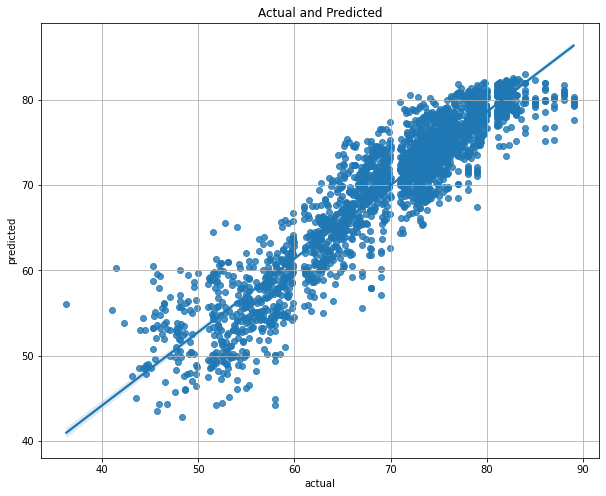

In [1010]:
check_linearity(result,"actual","predicted")

### Considering the highest coefficient and lowest coefficient will plot scatter plot

In [1011]:
lreg.coef_

array([ 107.08693928,  735.31581314,   69.41244132, -882.26763975,
         88.81214922,   32.33079032, -104.0774947 , -440.30319483,
         48.58557204,  102.33820314, -218.89951298,  145.26331649,
        166.82997043])

Text(0.5, 1.0, 'population has low coefficient value')

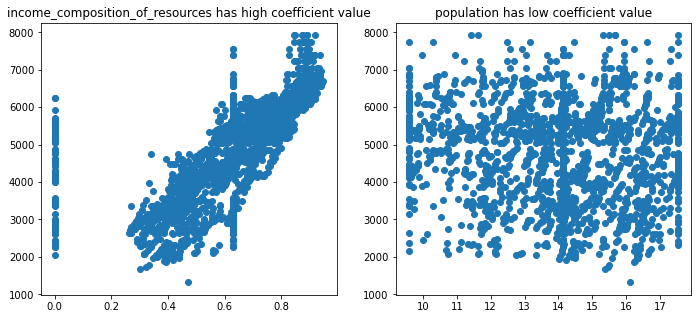

In [1012]:
plt.figure(figsize=(18,5))
plt.subplot(131)
plt.scatter(x_train["income_composition_of_resources"],y_train)
plt.title("income_composition_of_resources has high coefficient value")
plt.subplot(132)
plt.scatter(x_train["population"],y_train)
plt.title("population has low coefficient value")

<h4> In regression analysis, the beta coefficient  represents the change in the dependent variable (response) for a one-unit change in the independent variable (predictor), assuming all other variables are held constant. When the beta value is high, it indicates a stronger relationship or impact of that particular independent variable on the dependent variable </h4>

<h2> 2) Normality of the Error Terms </h2>

 This assumes that the error terms of the model are normally distributed. 
 
 
<h3> What it will effect </h3>

 - The estimates of the regression coefficients may still be unbiased, but they may not be as efficient or have the minimum        variance properties.
 
 - Standard errors are used to calculate confidence intervals and conduct hypothesis tests. If the errors are not normally        distributed, the standard errors may be biased, leading to incorrect conclusions about the statistical significance of the      coefficients.
 
 - Confidence intervals may be wider or narrower .
 
<h3> How to detect it </h3>

  - By plotting the histogram of residuals
  
  - By ploting the Q-Q plot of the residuals

<h3> How to fix it </h3>

  - By removing the outliers will solve this problem.
  
  - Non linear transformation of the variable.

In [1013]:
#error should be normally distributed
def check_normallity_errors(residuals):
    plt.figure(figsize=(8,6))
    sns.distplot(residuals)
    plt.grid(visible=True)
    plt.title("normal distribution of error")
    plt.show()
    
    plt.figure(figsize=(8,6))
    sp.probplot(residuals,dist="norm",plot=plt)
    plt.title("Q-Q plot of error")
    plt.show()

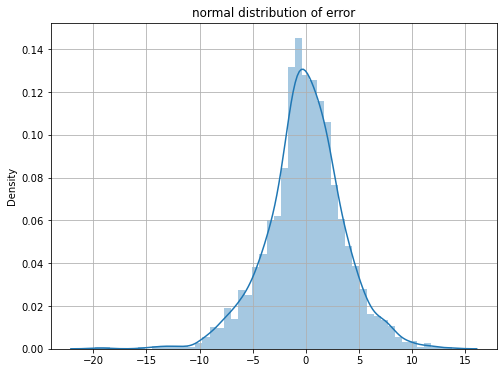

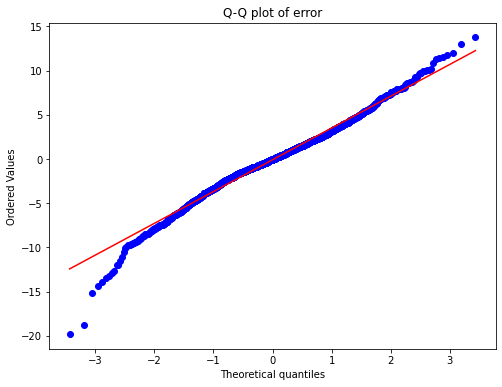

In [1014]:
check_normallity_errors(residuals)

<h4> By observing the above graph , which indicates that the tails of this distribution are too light to be considered as normal. </h4>

<h2> 3) Multicollinearity </h2>

This assumes that the predictors used in the regression are not correlated with each other.This won’t cause our model unusable if violated, but it will cause issues with the interpretability of the model.

<h3> What it will effect </h3>

  - Affects the inference drawn from the estimated regression model.
  - The presence of multicollinearity has a serious effect on the least square estimates of the regression coefficients.
  
<h3> How to detect it </h3>
 
  - Examination of the correlation Matrix
  
  - Using the Variance Inflation Factor
  
  - Eigensystem Analysis
  
<h3> How to fix it </h3>

  - Drop some of the variables which cause the high collinearity.
  
  - Use regularization methods like Ridge Regression or Lasso Regression.
  
  - Use of principal component regression.

In [1015]:
#multicollinearity
def check_multicollinearity(X):
    plt.figure(figsize=(12,8))
    sns.heatmap(X.corr(),annot=True)
    plt.show()

    #calculate vif
    print("Variance inflation factor (VIF)")
    vif_values = [vif(X,i) for i in range(len(X.columns))]

    vif_result=pd.DataFrame()
    vif_result["col_nanme"]=X.columns
    vif_result["VIF"]=vif_values
    return vif_result

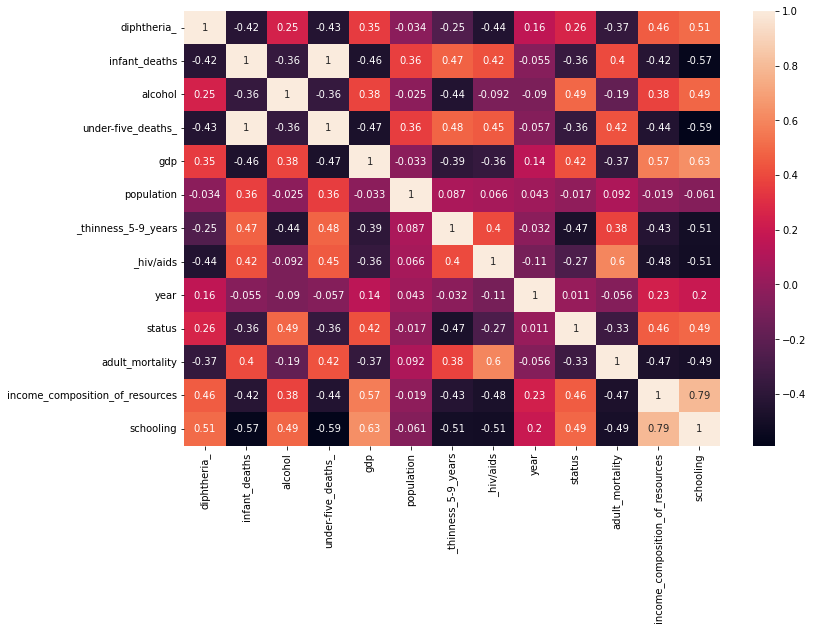

Variance inflation factor (VIF)


,col_nanme,VIF
0,diphtheria_,11.965183
1,infant_deaths,349.721560
2,alcohol,6.234834
3,under-five_deaths_,377.731039
4,gdp,40.011648
5,population,58.012515
6,_thinness_5-9_years,9.373633
7,_hiv/aids,3.325170
8,year,113.455798
9,status,2.013164


In [1016]:
check_multicollinearity(x_train)

<h4> From this above result we observed that there lots of variable is highly correlated with other independent variable. Let's try to fix it. </h4>

<h2> 4) Autocorrelation </h2>

This assumes no autocorrelation of the error terms. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

<h3> What it will effect </h3>

 - This will impact our model estimates.
 
<h3> How to detect it </h3>
 
 - Using Durbin_Wastons test (D-W test)
 
<h3> How to fix it </h3>

 - Increasing the sample size might help reduce the impact of autocorrelation.
 
 - By adding lag variables can fix this problem .

In [1017]:
#Durbin-Waston test
def check_autocorrelation(residuals):
    durbinWatson = durbin_watson(residuals)
    print("D-W test statistic :",durbinWatson)
    if(round(durbinWatson,1)<2):
        print("positive autocorrelation")
    elif(round(durbinWatson,1)>2):
        print("negative autocorrelation")
    else:
        print("There is no autocorrelation")

In [1018]:
check_autocorrelation(residuals)

D-W test statistic : 2.03127875802382
There is no autocorrelation


<h4>  By observing the above result, D-W test which is equivalent to 2. Hence the conclusion is there is no autocorrelation </h4>

<h2> 5) homoscedasticity </h2>

This assumes that costant variance within the error terms is called homoscedasticity. and the disturbances are termed as homoscedastic disturbances

<h3> What it will effect </h3>

 - The standard errors may be biased, leading to incorrect conclusions about the statistical significance of the coefficients.
 
 - Confidence intervals may be wider or narrower.
 
<h3> How to detect it </h3>

 -  By plot the residuals.
 
 -  Goldfeld-Quandt test
 
<h3> How to fix it </h3>

 - By removing the skewness in the distribution.
 
 - Avoid incorrect data transformation and incorrect functional form of the model.

In [1019]:
def check_homoscedasticity(result,residuals):
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=result.index, y=residuals, alpha=0.5)
    plt.plot(np.repeat(0, result.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

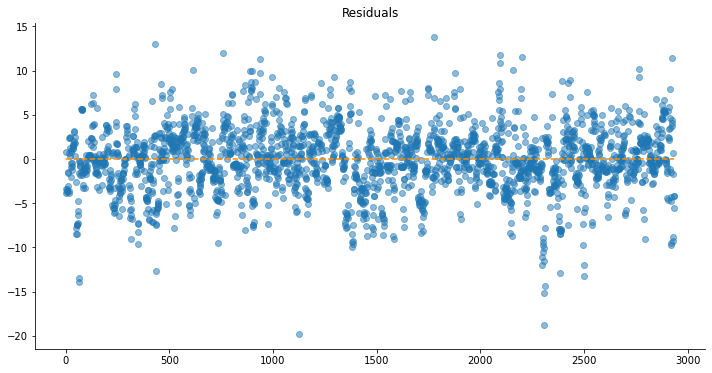

In [1020]:
check_homoscedasticity(result,residuals)

<h4> By examining the results above, it appears that the residuals are consistently distributed. In other words, there is a uniform or constant pattern observed in the distribution of residuals. </h4>

<h3> By looking the assumptions of the regression, Here facing the problem of the multicollinearity. Let's try to fix it. </h3>
<h4> Let drop the feature variable which cause the high collinearity within the regressor. </h4>

 By looking the value of VIF (which is >5) droped the variables. 

In [1021]:
new_x_train=x_train.drop(columns=["infant_deaths","schooling","year","gdp",
                                 "population","diphtheria_","_thinness_5-9_years"])

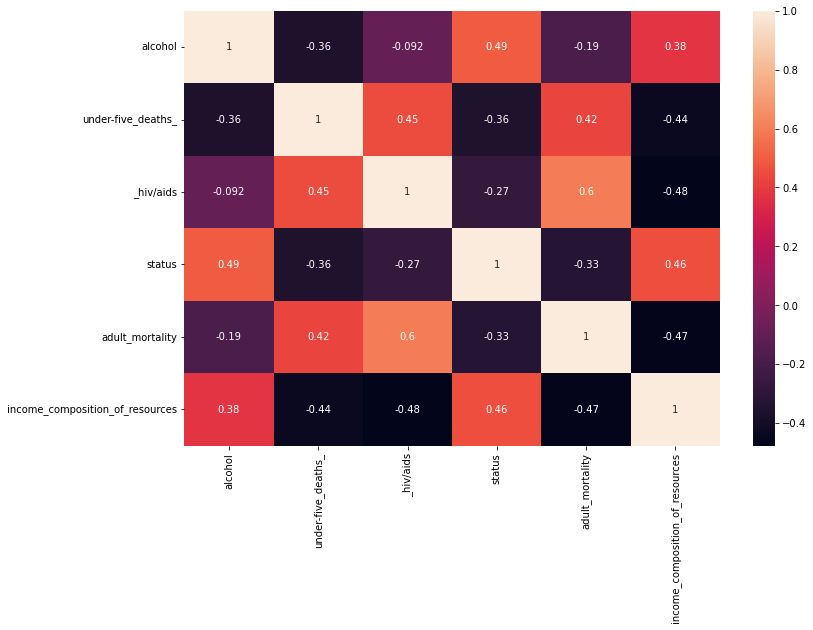

Variance inflation factor (VIF)


,col_nanme,VIF
0,alcohol,5.217539
1,under-five_deaths_,2.878757
2,_hiv/aids,2.791874
3,status,1.837512
4,adult_mortality,4.552828
5,income_composition_of_resources,5.802548


In [1022]:
check_multicollinearity(new_x_train)

<h4> From the above results, it is evident that two variables are correlated. In this case, dropping the regressor is not a viable option because doing so would significantly decrease the performance of the model (strong relationship between these variables and the dependent variable). Therefore, regularization methods or principal component regression can be considered as alternatives. </h4>

In [1023]:
lreg=LinearRegression()
lreg.fit(new_x_train,y_train)

LinearRegression()

In [1024]:
y_pred=y_pred=lreg.predict(new_x_train)

In [1025]:
print('Mean square Error (MsE):', round(mean_squared_error(y_train, y_pred),3))  
print('Mean square Error (MRSE):', math.sqrt(round(mean_squared_error(y_train, y_pred),3)))

r_square=round(r2_score(y_train, y_pred),5)
print('R2_score:',r_square) 

n=2350
k=6
adjusted_r_squared = 1 - ((1 - r_square) * (n - 1) / (n - k - 1))
print("Adjusted r2_score",round(adjusted_r_squared,5))

Mean square Error (MsE): 273516.147
Mean square Error (MRSE): 522.9877120927413
R2_score: 0.83033
Adjusted r2_score 0.8299


<h4> Before removing the correlated variable we get r_sqaure= 0.856 and adjusted r_sqaure = 0.855. So After removing the correlated variable there is no lots of difference in the performance of the model. </h4>

<h4> Hence we can considered it has a best model </h4>

<h3> Let look for Future data </h3>

In [1026]:
#lets check for test data
x_test=x_test.drop(columns=["hepatitis_b","_bmi_","total_expenditure","_thinness__1-19_years",
                           "polio","infant_deaths","schooling","percentage_expenditure","year","gdp",
                            "population","diphtheria_","_thinness_5-9_years","measles_"])

In [1027]:
lreg=LinearRegression()
lreg.fit(x_test,y_test)

LinearRegression()

In [1028]:
y_pred=y_pred=lreg.predict(x_test)

In [1029]:
print('Mean square Error (MsE):', round(mean_squared_error(y_test, y_pred),3))  
print('Mean square Error (MRSE):', math.sqrt(round(mean_squared_error(y_test, y_pred),3)))

r_square=round(r2_score(y_test, y_pred),4)
print('R2_score:',r_square) 

n=2350
k=16
adjusted_r_squared = 1 - ((1 - r_square) * (n - 1) / (n - k - 1))
print("Adjusted r2_score",round(adjusted_r_squared,4))

Mean square Error (MsE): 273655.514
Mean square Error (MRSE): 523.1209363044076
R2_score: 0.8204
Adjusted r2_score 0.8192


<h4> Here  we can say that performance of the model is good for the future data </h4>